In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
background = Image.open("human_diagram.png")

# Coordinates (hard coded)
coordinates = [(218, 1100), (672, 563), (389, 510), (554, 170), (497, 75), (613, 1279), (545, 775), (500, 890), (423, 687), (873, 1054), (430, 980), (823, 864)]

organs = ['Adipose Subcutenous', 'Artery Aorta', 'Artery Coronary', 'Brain Cerebellum', 'Brain Cortex', 'Sigmoid Colon', 'Heart', 'Liver', 'Lung', 'Nerve', 'Pancreas', 'Skin']

data = pd.read_csv('sorted.csv')
z_scores_columns = data.columns[1:]

In [8]:
selected_columns = ['Heart Extreme Agers', 'Sigmoid Colon Extreme Agers', 'Multi-Organ Extreme Agers']
filtered_columns = [col for col in z_scores_columns if col in selected_columns]

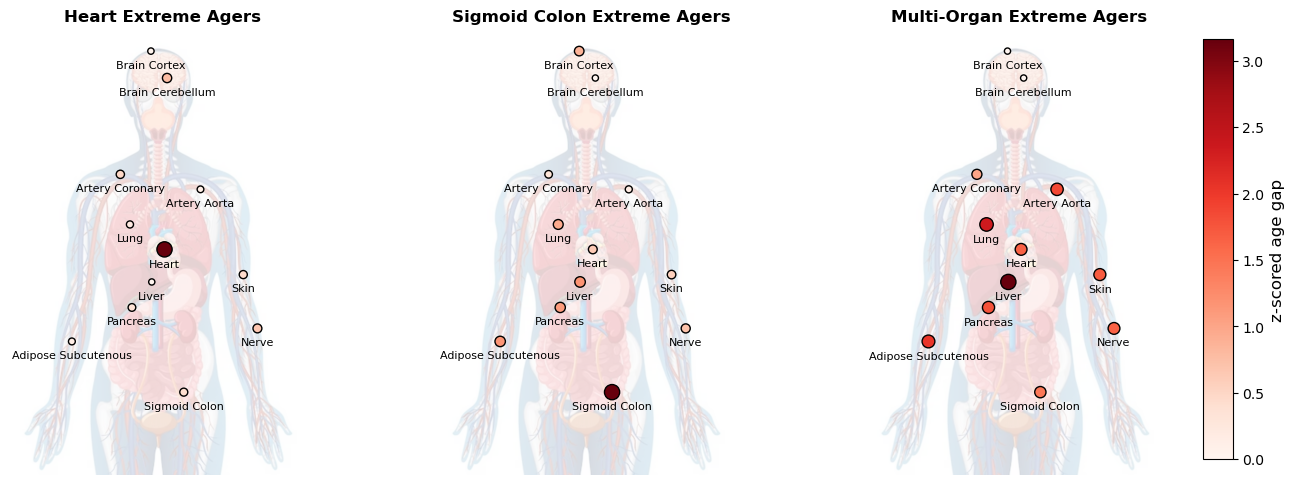

In [9]:
# 3 pictures
n_cols = len(filtered_columns) 
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6))
axes = axes if n_cols > 1 else [axes]  # Ensure axes is always iterable

text_offset_factor = 0.05 * (max(y for _, y in coordinates) - min(y for _, y in coordinates))

for ax, column in zip(axes, filtered_columns):
    z_scores = data[column].values
    ax.imshow(background, alpha=0.2)
    point_sizes = 20 + (z_scores - np.min(z_scores)) / (np.max(z_scores) - np.min(z_scores)) * 100
    scatter = ax.scatter(
        [x for x, y in coordinates],
        [y for x, y in coordinates],
        c=z_scores,
        cmap='Reds',
        s=point_sizes,
        edgecolor='black'
    )

    for (x, y), organ, size in zip(coordinates, organs, point_sizes):
        ax.text(
            x, y + text_offset_factor + size * 0.02,
            f"{organ}", ha='center', fontsize=8, color='black'
        )
    ax.set_title(column, fontsize=12, weight='bold')
    ax.axis('off')

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label("z-scored age gap", fontsize=12)

fig.subplots_adjust(wspace=0.4, hspace=0.4)
plt.savefig('extreme_agers_filtered.png')
plt.show()

In [10]:
# n_cols = 3
# n_rows = -(-len(z_scores_columns) // n_cols)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# axes = axes.flatten()

# text_offset_factor = 0.05 * (max(y for _, y in coordinates) - min(y for _, y in coordinates))

# for idx, (ax, column) in enumerate(zip(axes, z_scores_columns)):
#     z_scores = data[column].values
#     ax.imshow(background, alpha=0.2)
#     point_sizes = 20 + (z_scores - np.min(z_scores)) / (np.max(z_scores) - np.min(z_scores)) * 100
#     scatter = ax.scatter(
#         [x for x, y in coordinates],
#         [y for x, y in coordinates],
#         c=z_scores,
#         cmap='Reds',
#         s=point_sizes,
#         edgecolor='black'
#     )

#     for (x, y), organ, size in zip(coordinates, organs, point_sizes):
#         ax.text(
#             x, y +  text_offset_factor + size * 0.02,
#             f"{organ}", ha='center', fontsize=8, color='black'
#         )
#     ax.set_title(column, fontsize=12, weight='bold')
#     ax.axis('off')

# for idx in range(len(z_scores_columns), len(axes)):
#     axes[idx].axis('off')

# cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02]) 
# cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
# cbar.set_label("z-scored age gap", fontsize=12)

# fig.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('extreme_agers_antomogram.png')
# plt.show()
